# Mutual Fund Analysis 

Install libraries

In [1]:
install.packages("readxl")
install.packages("tidyverse")
install.packages("httr")
install.packages("readr")
install.packages("lmtest")
library(readxl)
library(tidyverse)
library(httr)
library(readr)
library(lmtest)




The downloaded binary packages are in
	/var/folders/7q/j51tb1qj1gzb0_6_5sjjbp240000gn/T//Rtmpcj1XlO/downloaded_packages

The downloaded binary packages are in
	/var/folders/7q/j51tb1qj1gzb0_6_5sjjbp240000gn/T//Rtmpcj1XlO/downloaded_packages

The downloaded binary packages are in
	/var/folders/7q/j51tb1qj1gzb0_6_5sjjbp240000gn/T//Rtmpcj1XlO/downloaded_packages

The downloaded binary packages are in
	/var/folders/7q/j51tb1qj1gzb0_6_5sjjbp240000gn/T//Rtmpcj1XlO/downloaded_packages

The downloaded binary packages are in
	/var/folders/7q/j51tb1qj1gzb0_6_5sjjbp240000gn/T//Rtmpcj1XlO/downloaded_packages


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Load in benchmark and fund data 

In [2]:
benchmark <- read_excel("Bmark.xlsx")
funds <- read_excel("Funds.xlsx")

In [3]:
benchmark$Date <- as.Date(benchmark$Date)
funds$Date <- as.Date(funds$Date)

In [4]:
head(benchmark)
head(funds)

Date,Bmark
<date>,<dbl>
1997-07-31,0.023068259
1997-08-31,-0.043120585
1997-09-30,0.033429049
1997-10-31,-0.036454982
1997-11-30,-0.003482994
1997-12-31,0.002303030


Date,Fund1,Fund2,Fund3
<date>,<dbl>,<dbl>,<dbl>
1997-07-31,0.0388613,NA,0.0667892
1997-08-31,-0.0247934,NA,-0.0543015
1997-09-30,0.0611854,NA,0.0444246
1997-10-31,-0.0201741,NA,-0.0628840
1997-11-30,0.0260078,NA,0.0078901
1997-12-31,0.0353300,NA,0.0228654


Merge the Funds and Benchmark data frames 

In [5]:
data <- merge(funds, benchmark, by = "Date")
data$Date <- as.Date(data$Date)
data


Date,Fund1,Fund2,Fund3,Bmark
<date>,<dbl>,<dbl>,<dbl>,<dbl>
1997-07-31,0.0388613,NA,0.0667892,0.0230682589
1997-08-31,-0.0247934,NA,-0.0543015,-0.0431205847
1997-09-30,0.0611854,NA,0.0444246,0.0334290489
1997-10-31,-0.0201741,NA,-0.0628840,-0.0364549817
1997-11-30,0.0260078,NA,0.0078901,-0.0034829944
1997-12-31,0.0353300,NA,0.0228654,0.0023030296
1998-01-31,-0.0004264,NA,0.0061301,0.0105488933
1998-02-28,0.0322099,NA,0.0412977,0.0433652963
1998-03-31,0.0440154,0.0247326,0.0750467,0.0225279913


Calculate Metric data for the 3 funds 

In [6]:
tracking_error <- sd(data$Fund1 - data$Bmark, na.rm = TRUE) * sqrt(12)
information_ratio <- mean(data$Fund1 - data$Bmark, na.rm = TRUE) / sd(data$Fund1 - data$Bmark, na.rm = TRUE) * sqrt(12)
beta <- cov(data$Fund1, data$Bmark, use = "pairwise.complete.obs") / var(data$Bmark, na.rm = TRUE)
results <- data.frame(Fund = "Fund1", TrackingError = tracking_error, InformationRatio = information_ratio, Beta = beta)


In [7]:
tracking_error <- sd(data$Fund2 - data$Bmark, na.rm = TRUE) * sqrt(12)
information_ratio <- mean(data$Fund2 - data$Bmark, na.rm = TRUE) / sd(data$Fund2 - data$Bmark, na.rm = TRUE) * sqrt(12)
beta <- cov(data$Fund2, data$Bmark, use = "pairwise.complete.obs") / var(data$Bmark, na.rm = TRUE)
results <- rbind(results, data.frame(Fund = "Fund2", TrackingError = tracking_error, InformationRatio = information_ratio, Beta = beta))

tracking_error <- sd(data$Fund3 - data$Bmark, na.rm = TRUE) * sqrt(12)
information_ratio <- mean(data$Fund3 - data$Bmark, na.rm = TRUE) / sd(data$Fund3 - data$Bmark, na.rm = TRUE) * sqrt(12)
beta <- cov(data$Fund3, data$Bmark, use = "pairwise.complete.obs") / var(data$Bmark, na.rm = TRUE)
metrics <- rbind(results, data.frame(Fund = "Fund3", TrackingError = tracking_error, InformationRatio = information_ratio, Beta = beta))


In [8]:
metrics

Fund,TrackingError,InformationRatio,Beta
<chr>,<dbl>,<dbl>,<dbl>
Fund1,0.05250632,0.7690834,0.8963913
Fund2,0.04802328,0.9642357,1.0064304
Fund3,0.06673098,0.6425230,1.1867634


Notes on the funds metrics

Fund1 has a relatively low tracking error of 0.0525, which suggests that it closely tracks its benchmark index. Its information ratio of 0.7691 indicates that it generates about 0.7691 units of excess return per unit of tracking error. Its beta of 0.8964 suggests that it is slightly less volatile than the benchmark.

Fund2 has a slightly lower tracking error of 0.0480 compared to Fund1, indicating that it is even better at tracking its benchmark. Its information ratio of 0.9642 is higher than Fund1, indicating that it generates a higher level of excess return per unit of tracking error. However, its beta of 1.0064 suggests that it is slightly more volatile than the benchmark.

Fund3 has a higher tracking error of 0.0667 compared to Fund1 and Fund2, indicating that it deviates more from its benchmark. Its information ratio of 0.6425 is lower than the other two funds, indicating that it generates less excess return per unit of tracking error. Its beta of 1.1868 suggests that it is more volatile than the benchmark.
Overall, Fund2 appears to have the best combination of metrics among the three funds, with a lower tracking error and higher information ratio than Fund1, and a lower beta than Fund3. 


Factor Model

Load in 3 Factor Data 

In [9]:
url <- "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Developed_3_Factors_CSV.zip"
download.file(url, destfile = "Developed_3_Factors_CSV.zip")
unzip("Developed_3_Factors_CSV.zip", exdir = ".")
factors <- read.csv("Developed_3_Factors.csv", skip = 5)
head(factors)

,X,Mkt.RF,SMB,HML,RF
,<chr>,<chr>,<chr>,<chr>,<chr>
1,199007,0.77,0.53,-0.36,0.68
2,199008,-10.77,-1.51,0.48,0.66
3,199009,-11.89,1.32,0.81,0.60
4,199010,9.35,-7.58,-4.48,0.68
5,199011,-3.72,1.44,1.13,0.57
6,199012,1.11,-0.74,-1.48,0.60


Clean 3 Factors dataframe in order to merge with funds and benchmark data 

In [10]:
factors$X <- as.Date(paste0(factors$X, "01"), format = "%Y%m%d")
head(factors)

,X,Mkt.RF,SMB,HML,RF
,<date>,<chr>,<chr>,<chr>,<chr>
1,1990-07-01,0.77,0.53,-0.36,0.68
2,1990-08-01,-10.77,-1.51,0.48,0.66
3,1990-09-01,-11.89,1.32,0.81,0.60
4,1990-10-01,9.35,-7.58,-4.48,0.68
5,1990-11-01,-3.72,1.44,1.13,0.57
6,1990-12-01,1.11,-0.74,-1.48,0.60


In [11]:
factors$X <- floor_date(factors$X, "month") + days(days_in_month(factors$X) - 1)
head(factors)

,X,Mkt.RF,SMB,HML,RF
,<date>,<chr>,<chr>,<chr>,<chr>
1,1990-07-31,0.77,0.53,-0.36,0.68
2,1990-08-31,-10.77,-1.51,0.48,0.66
3,1990-09-30,-11.89,1.32,0.81,0.60
4,1990-10-31,9.35,-7.58,-4.48,0.68
5,1990-11-30,-3.72,1.44,1.13,0.57
6,1990-12-31,1.11,-0.74,-1.48,0.60


In [12]:
factors <- factors %>%
  rename(Date = X)
head(factors)

,Date,Mkt.RF,SMB,HML,RF
,<date>,<chr>,<chr>,<chr>,<chr>
1,1990-07-31,0.77,0.53,-0.36,0.68
2,1990-08-31,-10.77,-1.51,0.48,0.66
3,1990-09-30,-11.89,1.32,0.81,0.60
4,1990-10-31,9.35,-7.58,-4.48,0.68
5,1990-11-30,-3.72,1.44,1.13,0.57
6,1990-12-31,1.11,-0.74,-1.48,0.60


In [13]:
factors <- factors %>% 
  mutate(across(c(Mkt.RF, SMB, HML, RF), as.double))
head(factors)

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(c(Mkt.RF, SMB, HML, RF), as.double)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


,Date,Mkt.RF,SMB,HML,RF
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990-07-31,0.77,0.53,-0.36,0.68
2,1990-08-31,-10.77,-1.51,0.48,0.66
3,1990-09-30,-11.89,1.32,0.81,0.60
4,1990-10-31,9.35,-7.58,-4.48,0.68
5,1990-11-30,-3.72,1.44,1.13,0.57
6,1990-12-31,1.11,-0.74,-1.48,0.60


Merge 3 Factors dataframe with funds/benchmark data

In [14]:
Merged_factors <- merge(data, factors, by = "Date")

Merged_factors


Date,Fund1,Fund2,Fund3,Bmark,Mkt.RF,SMB,HML,RF
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1997-07-31,0.0388613,NA,0.0667892,0.0230682589,3.75,-4.49,-0.28,0.43
1997-08-31,-0.0247934,NA,-0.0543015,-0.0431205847,-5.56,5.37,0.50,0.41
1997-09-30,0.0611854,NA,0.0444246,0.0334290489,4.99,-2.09,-0.36,0.44
1997-10-31,-0.0201741,NA,-0.0628840,-0.0364549817,-5.54,0.79,1.17,0.42
1997-11-30,0.0260078,NA,0.0078901,-0.0034829944,0.30,-5.79,-0.50,0.39
1997-12-31,0.0353300,NA,0.0228654,0.0023030296,0.32,-3.62,1.95,0.48
1998-01-31,-0.0004264,NA,0.0061301,0.0105488933,1.92,-0.36,-1.02,0.43
1998-02-28,0.0322099,NA,0.0412977,0.0433652963,6.50,0.05,0.51,0.39
1998-03-31,0.0440154,0.0247326,0.0750467,0.0225279913,3.80,-0.66,2.02,0.39


Creat metrics now using 3 factor data and save the dataframe  

In [15]:



data <- merge(funds, factors, by = "Date")
data$Date <- as.Date(data$Date)

run_regression <- function(fund_name) {
  fund_col <- which(names(data) == fund_name)
  ff_model <- lm(data[,fund_col] ~ Mkt.RF + SMB + HML, data = data)
  annualize <- 12 # We assume that the input data is monthly
  alpha <- (coefficients(ff_model)[1] - (factors$RF/100))/annualize
  alpha_tstat <- coef(summary(ff_model))[1, "t value"]
  market_beta <- coefficients(ff_model)[2]
  market_tstat <- coef(summary(ff_model))[2, "t value"]
  size_beta <- coefficients(ff_model)[3]
  size_tstat <- coef(summary(ff_model))[3, "t value"]
  value_beta <- coefficients(ff_model)[4]
  value_tstat <- coef(summary(ff_model))[4, "t value"]
  adj_r2 <- summary(ff_model)$adj.r.squared
  return(data.frame(Fund = fund_name, 
                     Alpha = alpha,
                     Alpha_tStat = alpha_tstat,
                     Developed_Market_Beta = market_beta,
                     Developed_Market_tStat = market_tstat,
                     Developed_Size_Beta = size_beta,
                     Developed_Size_tStat = size_tstat,
                     Developed_Value_Beta = value_beta,
                     Developed_Value_tStat = value_tstat,
                     Adj_R2 = adj_r2))
}

results <- bind_rows(run_regression("Fund1"), 
                     run_regression("Fund2"), 
                     run_regression("Fund3"))



Warning message in data.frame(Fund = fund_name, Alpha = alpha, Alpha_tStat = alpha_tstat, :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Fund = fund_name, Alpha = alpha, Alpha_tStat = alpha_tstat, :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Fund = fund_name, Alpha = alpha, Alpha_tStat = alpha_tstat, :
“row names were found from a short variable and have been discarded”


In [16]:
results

Fund,Alpha,Alpha_tStat,Developed_Market_Beta,Developed_Market_tStat,Developed_Size_Beta,Developed_Size_tStat,Developed_Value_Beta,Developed_Value_tStat,Adj_R2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fund1,-3.257644e-04,3.39277,0.005683589,30.04616,-0.001302163,-3.247032,0.002737984,8.143453,0.7953663
Fund1,-3.090977e-04,3.39277,0.005683589,30.04616,-0.001302163,-3.247032,0.002737984,8.143453,0.7953663
Fund1,-2.590977e-04,3.39277,0.005683589,30.04616,-0.001302163,-3.247032,0.002737984,8.143453,0.7953663
Fund1,-3.257644e-04,3.39277,0.005683589,30.04616,-0.001302163,-3.247032,0.002737984,8.143453,0.7953663
Fund1,-2.340977e-04,3.39277,0.005683589,30.04616,-0.001302163,-3.247032,0.002737984,8.143453,0.7953663
Fund1,-2.590977e-04,3.39277,0.005683589,30.04616,-0.001302163,-3.247032,0.002737984,8.143453,0.7953663
Fund1,-1.924310e-04,3.39277,0.005683589,30.04616,-0.001302163,-3.247032,0.002737984,8.143453,0.7953663
Fund1,-1.590977e-04,3.39277,0.005683589,30.04616,-0.001302163,-3.247032,0.002737984,8.143453,0.7953663
Fund1,-1.257644e-04,3.39277,0.005683589,30.04616,-0.001302163,-3.247032,0.002737984,8.143453,0.7953663


In [17]:
write.csv(results, file = "results.csv", row.names = FALSE)

Plot the linear regression for each fund

Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


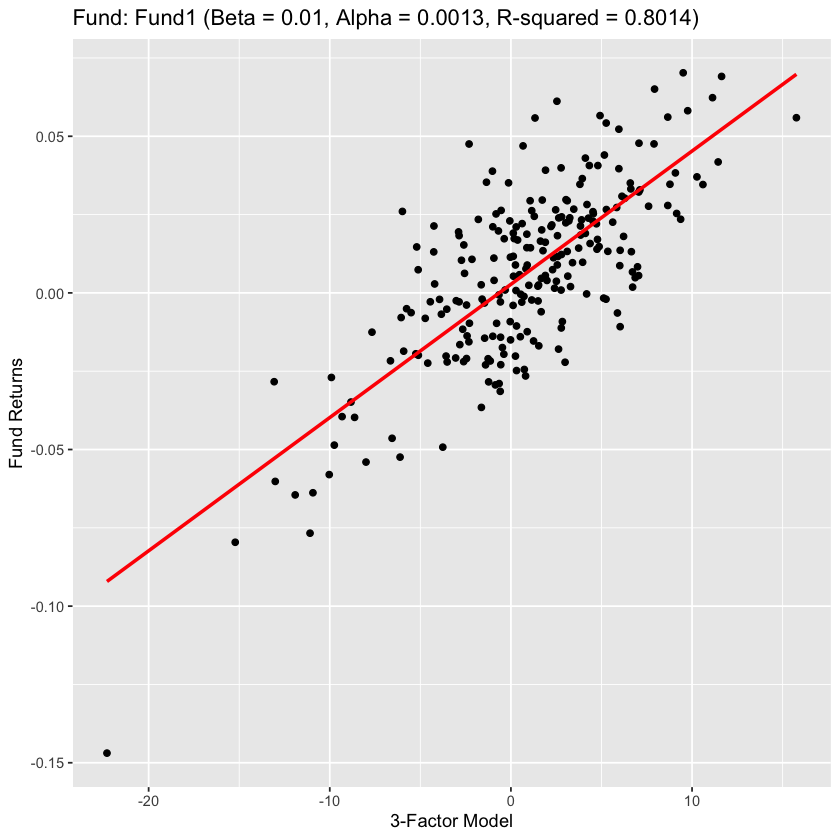

Warning message:
“Removed 27 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 27 rows containing missing values (`geom_point()`).”


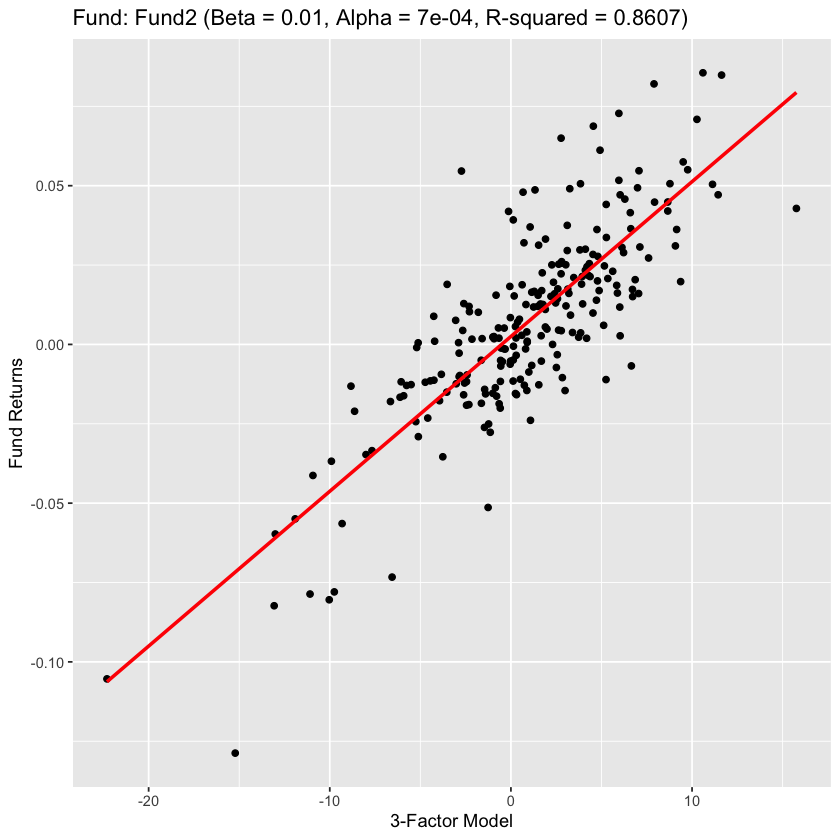

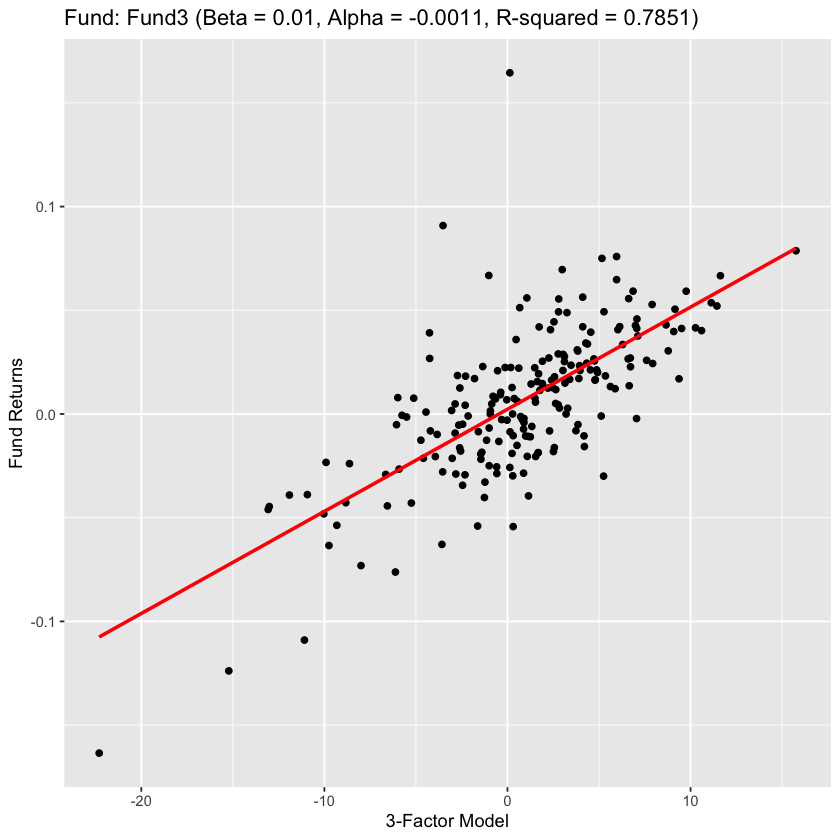

In [18]:
library(ggplot2)

# Create a function to plot the regression for each fund
plot_regression <- function(fund_name) {
  # Run the regression
  fund_col <- which(names(data) == fund_name)
  ff_model <- lm(data[, fund_col] ~ Mkt.RF + SMB + HML + RF, data = Merged_factors)
  
  # Extract the coefficients and R-squared
  beta <- ff_model$coefficients[2]
  alpha <- ff_model$coefficients[1]
  r_squared <- summary(ff_model)$r.squared
  
  # Create the plot
  p <- ggplot(Merged_factors, aes(x = Mkt.RF + SMB + HML, y = !!sym(fund_name))) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "red", formula = y ~ x) +
    xlab("3-Factor Model") +
    ylab("Fund Returns") +
    ggtitle(paste0("Fund: ", fund_name, " (Beta = ", round(beta, 2), ", Alpha = ", round(alpha, 4), ", R-squared = ", round(r_squared, 4), ")"))
  
  return(p)
}

# Plot the regression for each fund
plot_regression("Fund1")
plot_regression("Fund2")
plot_regression("Fund3")


The three funds exhibit a statistically significant r-squared value, indicating a strong linear relationship with the 3 factor model. Additionally, the 3 factor model displays a positive correlation with the returns of the funds.